In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker
from measures import *
from plots import *
from utils import *

INFO:datasets:PyTorch version 2.2.2 available.


In [2]:
dd = lambda x: np.mean(d_dimensional_distance(np.array(x)))
ent = lambda x: entropy_of_list(x)
pairwise = lambda x: np.mean(pairwise_jensen_shannon_divergence(np.array(x))) / 2
general = lambda x: np.mean(generalized_jsd(np.array(x)))

In [10]:
def plot_entropy_by_distance(n=20):
    """n is the number of different distributions to compare.
    """

    d_details = [{'color' : ['lightsteelblue', (83 / 255, 160 / 255, 83 / 255), 'sandybrown'],
                 'original' : [0, 1],
                 'additional' : [1, 0],
                 'marker' : 'o'},
                {'color' : ['cornflowerblue', 'forestgreen', 'bisque'],
                 'original' : [0, 1],
                 'additional' : [.5, .5],
                 'marker' : 'x'}
                ]
                # {'color' : ['royalblue', 'darkgreen'],
                #  'original' : [0, 1],
                #  'additional' : [.1, .9],
                #  'marker' : 'v'}]

    # The entropy calculation can't take a distribution
    a_few = True
    a_many = False
    dd_scores = [[] for i in range(len(d_details))]
    pair_scores = [[] for i in range(len(d_details))]
    general_scores = [[] for i in range(len(d_details))]    
    ent_scores = []
    indices = list(range(1, n))
    for i in indices:
        for j in range(len(d_details)):
            items = [d_details[j]['original']] + [d_details[j]['additional']] * i
            dd_scores[j].append(dd(items))
            pair_scores[j].append(pairwise(items))
            general_scores[j].append(general(items))
        ent_scores.append(ent([a_few] + [a_many] * i))
    
    # Create a figure and a set of subplots
    fig, ax = plt.subplots()

    ax.plot(indices, ent_scores, color='red', marker='o', linestyle='-', linewidth=2, label='Shan. Entropy')

    # Plot f1_values with indices on x-axis and f1_values on y-axis
    for j in range(len(d_details)):
        for k in range(len(d_details[j]['color'])):
            if k == 0:
                score = dd_scores[j]
                name = "d-d"
            elif k == 1:
                score = pair_scores[j]
                name = "pairwise"
            elif k == 2:
                score = general_scores[j]
                name = "general"
            ax.plot(indices, score,
                    color=d_details[j]['color'][k],
                    marker=d_details[j]['marker'],
                    linestyle='-', linewidth=2,
                    label=f"{name} Jen.-Shan. : 1 x {d_details[j]['original']}, N x {d_details[j]['additional']}")
        print(np.array(pair_scores[j]) / (np.array(dd_scores[j])))
            
    # Add a legend
    ax.legend()
    
    ax.set_xlabel('Number of Distributions Opposed to the Original')
    ax.set_ylabel('Score')
    
    # Set x and y axes limits
    ax.set_xlim([0, n])
    ax.set_ylim([0, 1.05])# Show the plot
    # ax.set_xticks(np.arange(0, n, 1))
    ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
    
    ax.set_title(f'Jen. Shan. Divergence and Entropy for one original and N opposing')
    plt.savefig(f"figures/distance_entropy_n={n}.pdf", bbox_inches='tight')
    plt.show()

[0.89618094 0.68111893 0.62811797 0.62249743 0.63942372 0.66897988
 0.7054583  0.74483912 0.78412308 0.82115884 0.85456634 0.88363654
 0.90819161 0.92842776 0.94476788 0.95774159 0.96790102 0.97576651
 0.98179969]
[0.92947067 0.73399519 0.67031254 0.63866914 0.61974394 0.60715368
 0.5981745  0.59144818 0.58622166 0.58204378 0.57862781 0.5757828
 0.57337669 0.57131521 0.56952928 0.56796712 0.56658917 0.56536466
 0.56426932]


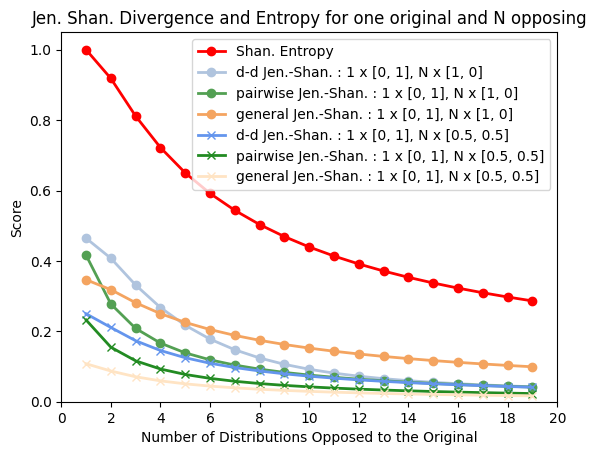

In [11]:
plot_entropy_by_distance()

[0.89618094 0.68111893 0.62811797 0.62249743 0.63942372 0.66897988
 0.7054583  0.74483912 0.78412308 0.82115884 0.85456634 0.88363654
 0.90819161 0.92842776 0.94476788 0.95774159 0.96790102 0.97576651
 0.98179969 0.98639181 0.98986563 0.99248049 0.99444127 0.99590725
 0.99699973 0.99747398 0.99740987 0.99734548 0.99728086 0.99721602
 0.99715099 0.99708578 0.99702043 0.99695493 0.99688931 0.99682358
 0.99675774 0.9966918  0.99662578 0.99655968 0.99649351 0.99642728
 0.99636098 0.99629463 0.99622822 0.99616177 0.99609528 0.99602874
 0.99596217 0.99589556 0.99582893 0.99576226 0.99569557 0.99562885
 0.99556211 0.99549535 0.99542857 0.99536177 0.99529495 0.99522812
 0.99516128 0.99509442 0.99502755 0.99496067 0.99489378 0.99482688
 0.99475997 0.99469306 0.99462614 0.99455921 0.99449228 0.99442534
 0.9943584  0.9942763  0.99422451 0.99415756 0.99409061 0.99402366
 0.9939567  0.99388975 0.99382279 0.99375584 0.99368888 0.99362193
 0.99355497 0.99348802 0.99342107 0.99335412 0.99328717 0.9932

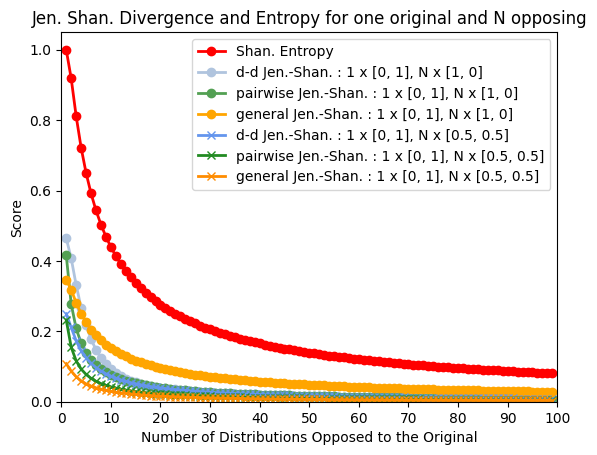

In [5]:
plot_entropy_by_distance(n=100)